<a href="https://colab.research.google.com/github/G-Shivani973/FMML_Projects/blob/main/Classification_II_Lab_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Classification II Lab 04

In [2]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
def performExperiment(trainSet, testSet, max_depth=None, feature_names=None, class_names=None, criterion="gini", min_samples_split=2, min_samples_leaf=1, drawTree=(8, 6)):
    clf = RandomForestClassifier(
        max_depth=max_depth,
        criterion=criterion,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
        n_estimators=10
    )

    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    print("Accuracy of the Random Forest on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))
    if drawTree:
        print("Here is a diagram of the tree created to evaluate each sample:")
        fig, ax = plt.subplots(figsize=drawTree)
        imgObj = tree.plot_tree(clf, filled=True, ax=ax, feature_names=feature_names, class_names=class_names, impurity=False, proportion=True, rounded=True, fontsize=10)
        plt.show()


In [7]:
def returnAccuracy(trainSet, testSet, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = RandomForestClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
        n_estimators=10
    )

    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return accuracy_score(y_pred, y_test)


In [8]:
def returnAccuracyDT(trainSet, testSet, max_depth=None, min_samples_split=2, min_samples_leaf=1):
    clf = tree.DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        splitter="best",
        random_state=0,
    )

    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return accuracy_score(y_pred, y_test)


In [9]:
def returnAccuracySvm(trainSet, testSet):
    clf = svm.LinearSVC()

    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    return accuracy_score(y_pred, y_test)


In [10]:
def giveAnExample(n):
    performExperiment((X_train, y_train), (X_test, y_test), feature_names=iris["feature_names"], class_names=iris["target_names"], max_depth=n)


In [11]:
def plotDecisionBoundary(X, y, pair, clf):
    x_min, x_max = X[:, pair[0]].min() - 1, X[:, pair[0]].max() + 1
    y_min, y_max = X[:, pair[1]].min() - 1, X[:, pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                        np.arange(y_min, y_max, 0.1))

    y_pred = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    y_pred = y_pred.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, y_pred, alpha=0.4)
    plt.scatter(X[:, pair[0]], X[:, pair[1]], c=y, s=50, edgecolor='k')
    plt.show()


In [12]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)


In [18]:
def performExperiment(trainSet, testSet, tree_index=0, max_depth=None, feature_names=None, class_names=None, criterion="gini", min_samples_split=2, min_samples_leaf=1, drawTree=(8, 6)):
    clf = RandomForestClassifier(
        max_depth=max_depth,
        criterion=criterion,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=0,
        n_estimators=10
    )

    X_train, y_train = trainSet
    X_test, y_test = testSet

    clf = clf.fit(X_train, y_train)

    # Select a specific tree from the forest (tree_index)
    selected_tree = clf.estimators_[tree_index]

    y_pred = clf.predict(X_test)

    print("Accuracy of the Random Forest on the test set: \n\n{:.3f}\n\n".format(accuracy_score(y_pred, y_test)))

    if drawTree:
        print("Here is a diagram of the tree created to evaluate each sample:")
        fig, ax = plt.subplots(figsize=drawTree)
        imgObj = tree.plot_tree(selected_tree, filled=True, ax=ax, feature_names=feature_names, class_names=class_names, impurity=False, proportion=True, rounded=True, fontsize=10)
        plt.show()


In [19]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)


In [20]:

# Example usage of returnAccuracy
accuracy_rf = returnAccuracy((X_train, y_train), (X_test, y_test), max_depth=4)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.9666666666666667


Accuracy of the Random Forest on the test set: 

1.000


Here is a diagram of the tree created to evaluate each sample:


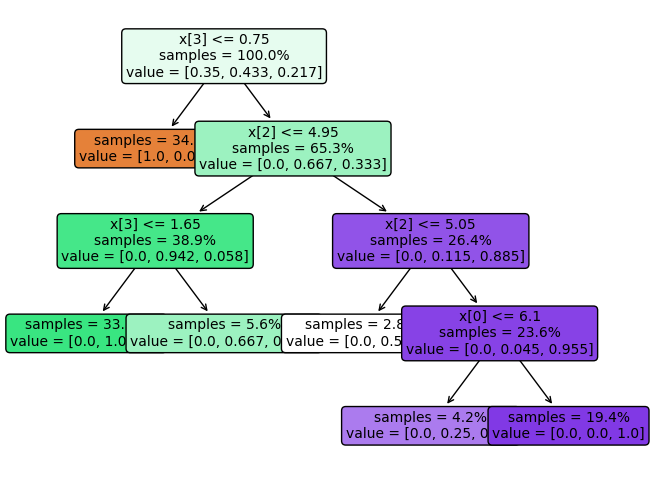

In [21]:
performExperiment((X_train, y_train), (X_test, y_test), tree_index=0, max_depth=10, min_samples_split=5, min_samples_leaf=2)

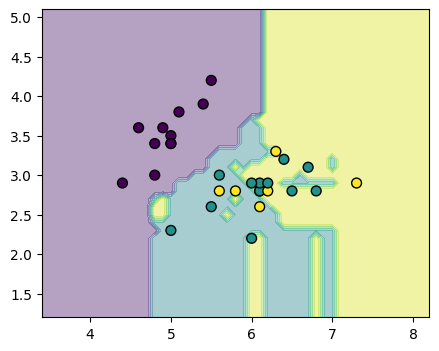

In [22]:
# Visualize decision boundaries
pair = [0, 1]
clf = RandomForestClassifier(max_depth=10)
clf.fit(X_train[:, pair], y_train)
plotDecisionBoundary(X_test, y_test, pair, clf)


In [23]:
# Evaluate accuracy for different tree depths
depths = [5, 10, 15]
for depth in depths:
    accuracy = returnAccuracy((X_train, y_train), (X_test, y_test), max_depth=depth)
    print(f"Accuracy for depth {depth}: {accuracy}")


Accuracy for depth 5: 0.9666666666666667
Accuracy for depth 10: 0.9666666666666667
Accuracy for depth 15: 0.9666666666666667


In [24]:
# Compare with SVM
svm_accuracy = returnAccuracySvm((X_train, y_train), (X_test, y_test))
print(f"SVM Accuracy: {svm_accuracy}")


SVM Accuracy: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


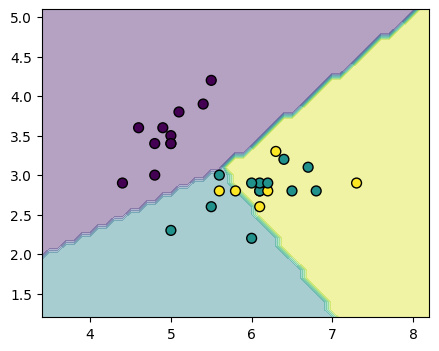

In [25]:
# Visualize decision boundaries for SVM
clf_svm = svm.LinearSVC()
clf_svm.fit(X_train[:, pair], y_train)
plotDecisionBoundary(X_test, y_test, pair, clf_svm)


In [27]:
  # Example: Parameter tuning for Random Forest
depths = [5, 10, 15]
for depth in depths:
    accuracy = returnAccuracy((X_train, y_train), (X_test, y_test), max_depth=depth)
    print(f"Accuracy for depth {depth}: {accuracy}")


Accuracy for depth 5: 0.9666666666666667
Accuracy for depth 10: 0.9666666666666667
Accuracy for depth 15: 0.9666666666666667


In [37]:
import os
os.system("wget https://raw.githubusercontent.com/Foundations-in-Modern-Machine-Learning/course-contents/main/Classification2/data/titanic/train.csv")

0

In [38]:
import pandas as pd
trainDf = pd.read_csv("train.csv")

In [39]:
for idx, row in trainDf.iterrows():
  if row["Sex"] == "female":
    trainDf.at[idx, "Sex"] = 0
  else:
    trainDf.at[idx, "Sex"] = 1
    # Since we are only exploring, lets make a validation set out of trainDf:

trainSet, testSet = train_test_split(trainDf, random_state = 0)

In [40]:
def relevantInfo(df):
  X = df.iloc[:, [2, 4, 5, 6, 7, 9]]
  y = df.iloc[:, 1]

  #Preprocessing to handle the missing data using a regressor
  imp = IterativeImputer(max_iter = 10, random_state=0)
  imp.fit(X)
  newDf = imp.transform(X)

  return newDf , y.to_numpy()

In [41]:
trainX, trainy = relevantInfo(trainSet)
testX, testy = relevantInfo(testSet)


In [42]:
plt.style.use("default")
performExperiment((trainX, trainy), (testX, testy), max_depth = 6, feature_names=[trainDf.columns[i] for i in [2, 4, 5, 6, 7, 9]], class_names=["Died", "Survived"], drawTree=False)

Accuracy of the Random Forest on the test set: 

0.834




<ipython-input-43-f21555baa6a0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


Text(0.5, 0, 'Depth of the tree')

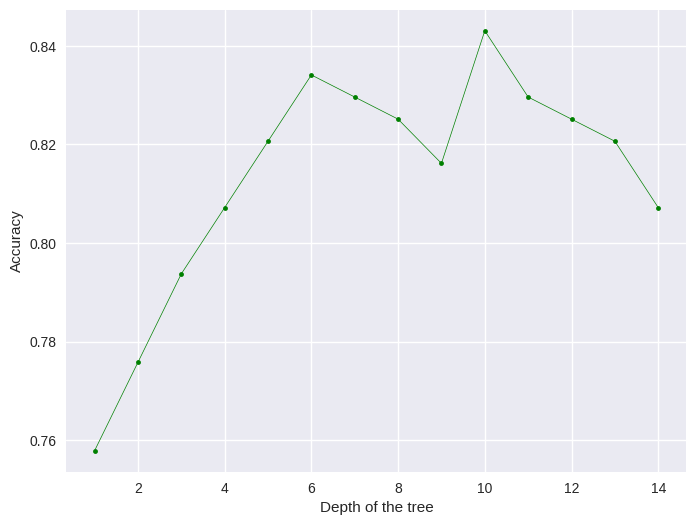

In [43]:
plt.style.use("seaborn")
plt.figure(figsize=(8,6))
fro, to = 1, 15
plt.plot(range(fro, to), [returnAccuracy((trainX, trainy), (testX, testy), max_depth = i) for i in range(fro, to)], "g.-", linewidth=0.5)
plt.ylabel("Accuracy")
plt.xlabel("Depth of the tree")

In [46]:
np.random.seed(0)
testAr = np.vstack(   [\
                      np.random.multivariate_normal(np.array([1, 1]), np.array([[0.5, -0.25], [-0.25, 0.5]]), size = 500, ),\
                      np.random.multivariate_normal(np.array([3, 3]), np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 500, )
                      ]\
                  )
testy = np.array([0] * int((testAr.shape[0]/2)) + [1] * int((testAr.shape[0]/2)))

def stabilityTest():

  ar = np.vstack(     [\
                      np.random.multivariate_normal(np.array([1, 1]), 1.5 * np.array([[2, -1], [-1, 2.0]]), size = 30, ),\
                      np.random.multivariate_normal(np.array([3, 3]), 2 * np.array([[0.75, -0.5], [-0.5, 0.75]]), size = 30, )
                      ]\
                )

  X = ar
  y = np.array([0] * int((ar.shape[0]/2)) + [1] * int((ar.shape[0]/2)))

  treeAcc = returnAccuracyDT((X, y), (testAr, testy), max_depth = 4)
  forestAcc = returnAccuracy((X, y), (testAr, testy), max_depth = 4)

  return treeAcc,  forestAcc

treeDat = []
forestDat = []
for i in range(60):
  treeAcc, forestAcc = stabilityTest()
  treeDat.append(treeAcc)
  forestDat.append(forestAcc)


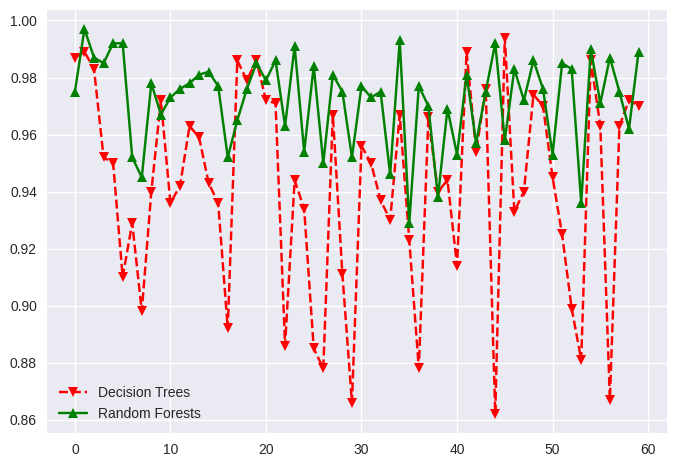

In [47]:
plt.plot(treeDat, "rv--", label="Decision Trees")
plt.plot(forestDat, "g^-", label="Random Forests")
plt.legend()
plt.show()
